In [1]:
#This capture is from the "UnionStation" dataset, it was recorder over 10 mins in Union Station, DTLA
#Tools used was the beacon spammer esp8266 sketch and Wireshark on a Macbook Pro
#Import all packets sent to our fake networks from real devices, and sample ten from the set
import pandas as pd
from matplotlib import pyplot as plt
wd = pd.read_csv('/Users/skickar/Desktop/UnionStation.csv', delimiter = ',', encoding='latin-1', header=0) 
wd.sample(10)

,No.,Time,Source,Destination,Protocol,Length,Channel frequency,Data rate (Mb/s),Channel,Channel.1,Transmitter address,Destination address,Type/Subtype,Info,Db,Signal strength (dBm),Tag,SSID
1166,277572,254.749568,Motorola_49:2b:77,6c:3f:23:e3:70:11,802.11,90,2412,1,1,1,f4:f1:e1:49:2b:77,6c:3f:23:e3:70:11,Probe Request,NaN,NaN,-76dBm,â\234\223,attwifi
390,95598,82.166122,Private_40:4f:80,6c:3f:23:e3:70:2e,802.11,59,2412,1,1,1,8c:84:01:40:4f:80,6c:3f:23:e3:70:2e,Authentication,NaN,NaN,-58dBm,NaN,NaN
1413,362015,328.002582,Apple_a4:d4:6d,6c:3f:23:e3:70:1d,802.11,83,2412,1,1,1,c0:d0:12:a4:d4:6d,6c:3f:23:e3:70:1d,Authentication,NaN,NaN,-77dBm,â\234\223,NaN
546,111549,97.244979,Apple_2b:43:f0,6c:3f:23:e3:70:11,802.11,83,2412,1,1,1,ac:e4:b5:2b:43:f0,6c:3f:23:e3:70:11,Authentication,NaN,NaN,-80dBm,â\234\223,NaN
432,103811,89.854070,Apple_13:38:c1,6c:3f:23:e3:70:11,802.11,70,2412,1,1,1,d8:1d:72:13:38:c1,6c:3f:23:e3:70:11,Authentication,NaN,NaN,-76dBm,â\234\223,NaN
1337,330957,299.303029,SamsungE_80:4c:fb,6c:3f:23:e3:70:48,802.11,70,2412,1,1,1,34:14:5f:80:4c:fb,6c:3f:23:e3:70:48,Authentication,NaN,NaN,-79dBm,â\234\223,NaN
285,85452,73.438992,Apple_13:38:c1,6c:3f:23:e3:70:01,802.11,70,2412,1,1,1,d8:1d:72:13:38:c1,6c:3f:23:e3:70:01,Authentication,NaN,NaN,-79dBm,â\234\223,NaN
1445,362729,328.942050,Apple_58:c0:04,6c:3f:23:e3:70:20,802.11,70,2412,1,1,1,54:4e:90:58:c0:04,6c:3f:23:e3:70:20,Authentication,NaN,NaN,-84dBm,â\234\223,NaN
1645,377174,341.968113,Apple_a4:d4:6d,6c:3f:23:e3:70:1d,802.11,83,2412,1,1,1,c0:d0:12:a4:d4:6d,6c:3f:23:e3:70:1d,Authentication,NaN,NaN,-77dBm,â\234\223,NaN
38,54980,45.884209,Motorola_49:2b:77,6c:3f:23:e3:70:2e,802.11,99,2412,1,1,1,f4:f1:e1:49:2b:77,6c:3f:23:e3:70:2e,Probe Request,NaN,NaN,-79dBm,â\234\223,Google Starbucks


In [2]:
## Examining the contents of a directed probe request to a fake network from a client
wd.iloc[38]

No.                                  54980
Time                               45.8842
Source                   Motorola_49:2b:77
Destination              6c:3f:23:e3:70:2e
Protocol                            802.11
Length                                  99
Channel frequency                     2412
Data rate (Mb/s)                         1
Channel                                  1
Channel.1                                1
Transmitter address      f4:f1:e1:49:2b:77
Destination address      6c:3f:23:e3:70:2e
Type/Subtype                 Probe Request
Info                                   NaN
Db                                     NaN
Signal strength (dBm)               -79dBm
Tag                              â\234\223
SSID                      Google Starbucks
Name: 38, dtype: object

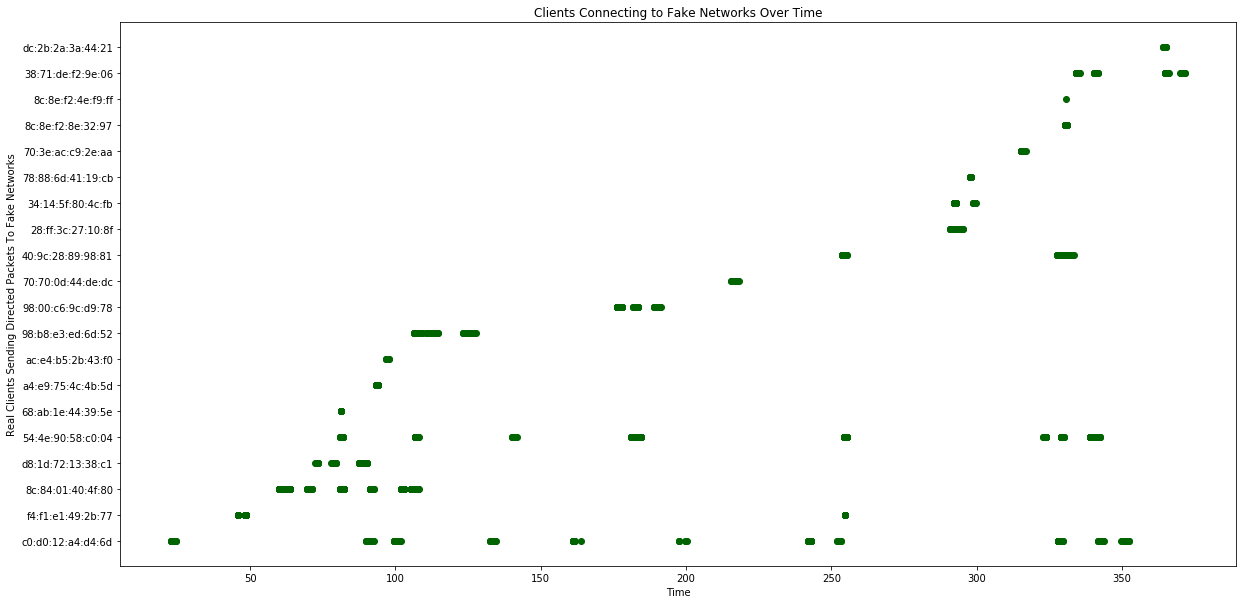

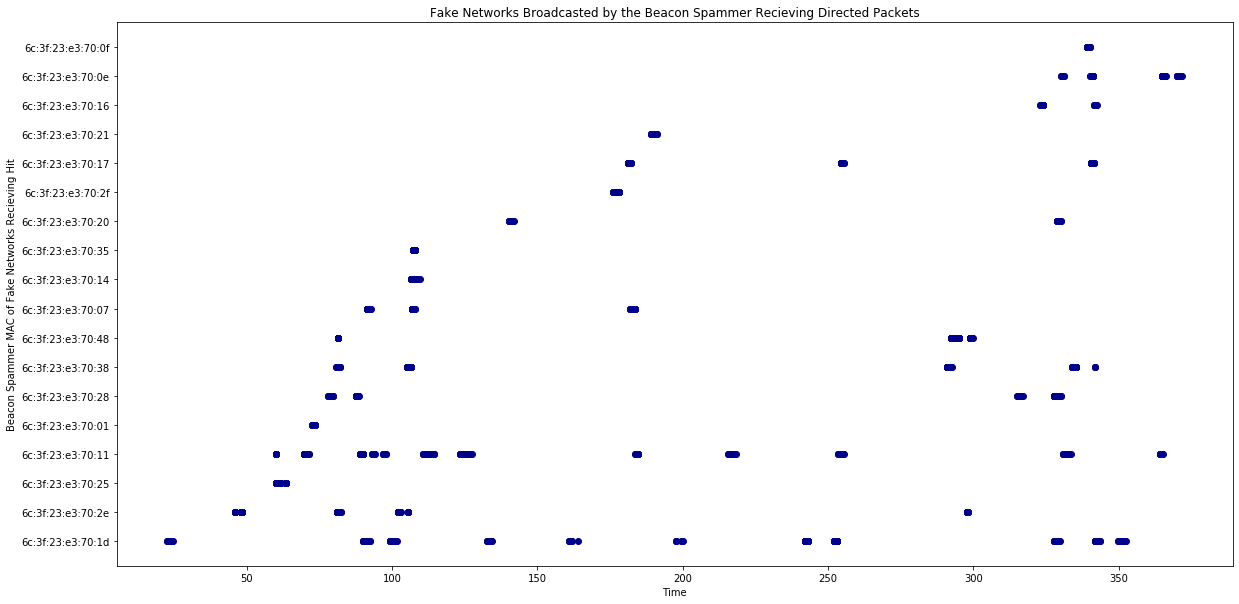

In [3]:
## Plotting directed packets (unmasked clients) connecting to fake networks over time
# Here, we analyze when a clients is connecting to a fake network over time in the first figure.
# In the second, we analyze which fake networks are recieving directed packets from unmasked clients over time.
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(wd['Time'], wd['Transmitter address'], 'o', color='DarkGreen')
plt.title('Clients Connecting to Fake Networks Over Time')
plt.xlabel('Time')
plt.ylabel('Real Clients Sending Directed Packets To Fake Networks')
plt.show()
plt.plot(wd['Time'], wd['Destination address'], 'o', color='DarkBlue')
plt.title('Fake Networks Broadcasted by the Beacon Spammer Recieving Directed Packets')
plt.xlabel('Time')
plt.ylabel('Beacon Spammer MAC of Fake Networks Recieving Hit')
plt.show()

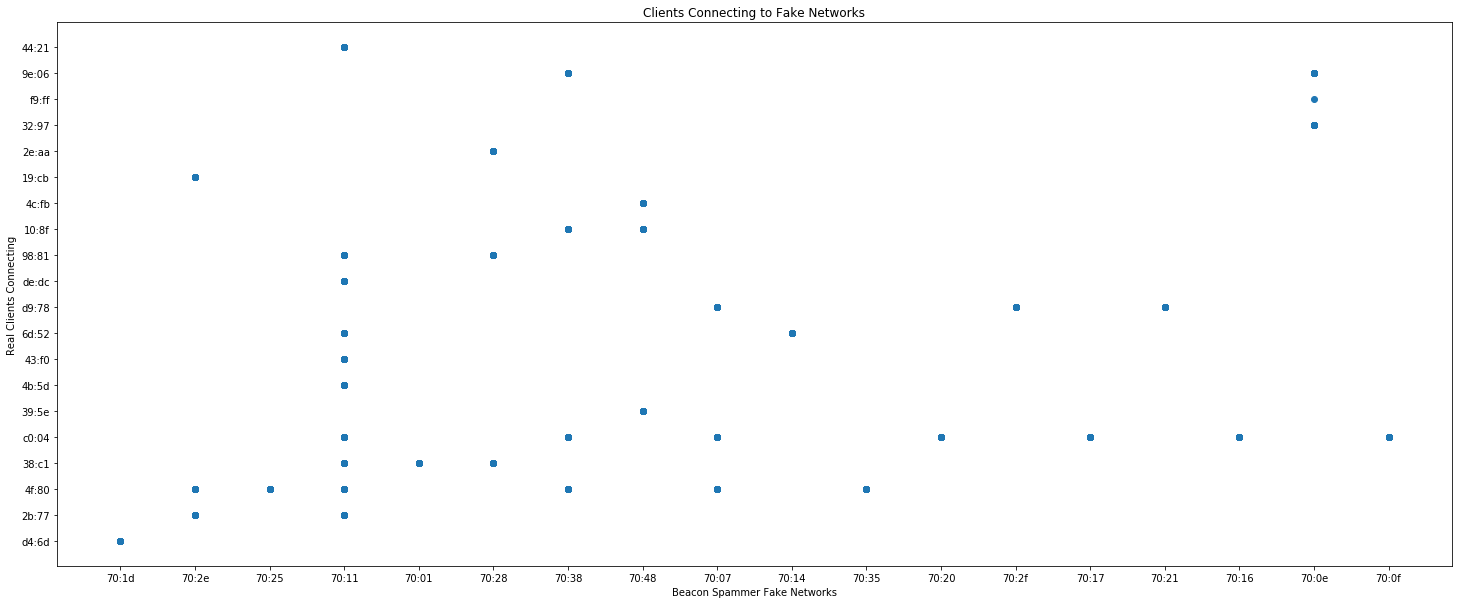

In [4]:

## Plotting which client MAC addresses responds to which fake network MAC addresses
## Here, we see a fingerprint for every client device on the left. 
## We can scan the row a device is in to determine which unique fake networks it will respond to.
## We can scan a column to find which fake networks cause the most client devices to respond. 
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(wd['Destination address'].str[-5:], wd['Transmitter address'].str[-5:], 'o',)
plt.title('Clients Connecting to Fake Networks')
plt.xlabel('Beacon Spammer Fake Networks')
plt.ylabel('Real Clients Connecting')
plt.show()

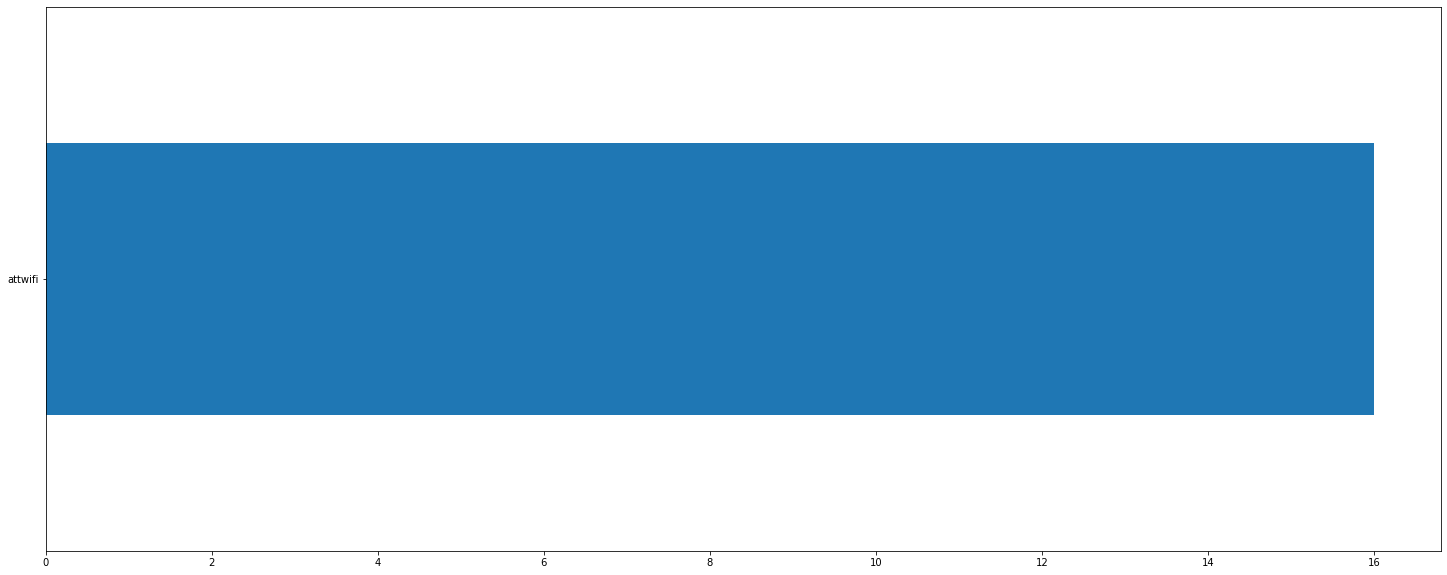

In [27]:
## Find the most popular network by matching the MAC address to one containing the SSID we need
# Directed probe requests have this, so we look for directed probe frames containing the SSID
popular = wd[wd['Destination address'].str.contains('70:11') & wd['Type/Subtype'].str.contains('Probe')]
popular['SSID'].value_counts().plot('barh')


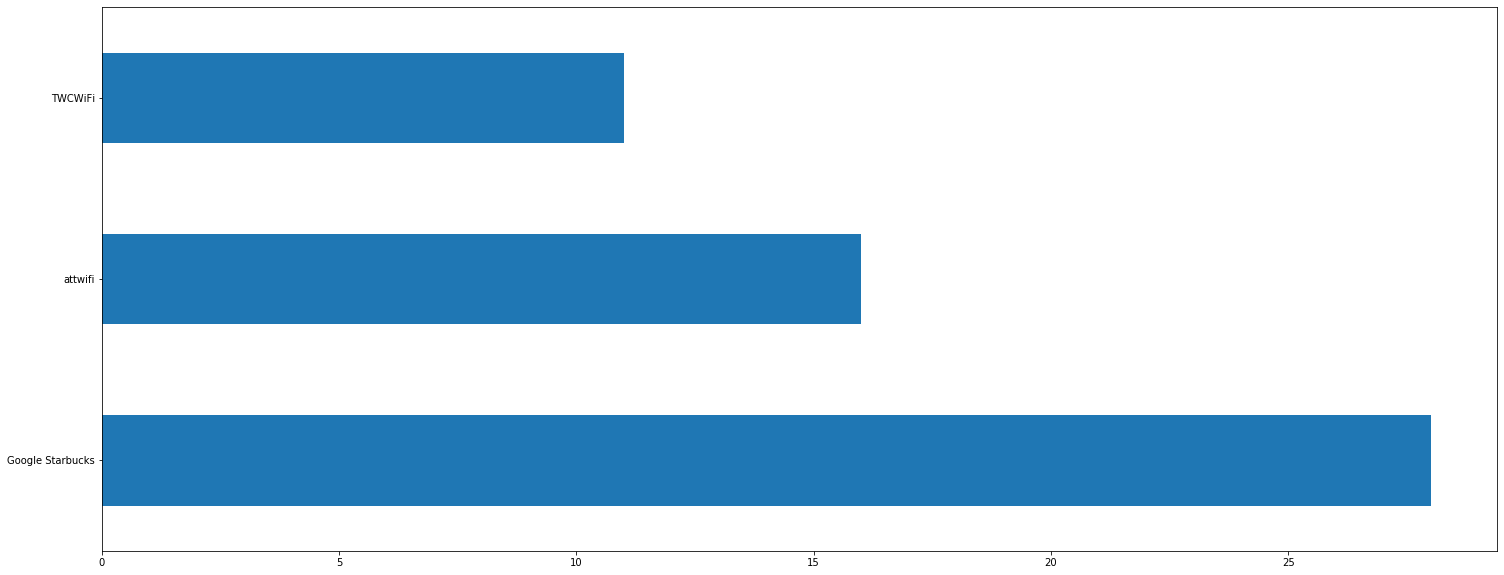

In [37]:
## Breakdown of the number all probe requests recieved that contain SSID's:
allNets = wd[wd['Type/Subtype'].str.contains('Probe')]
allNets['SSID'].value_counts().plot('barh')

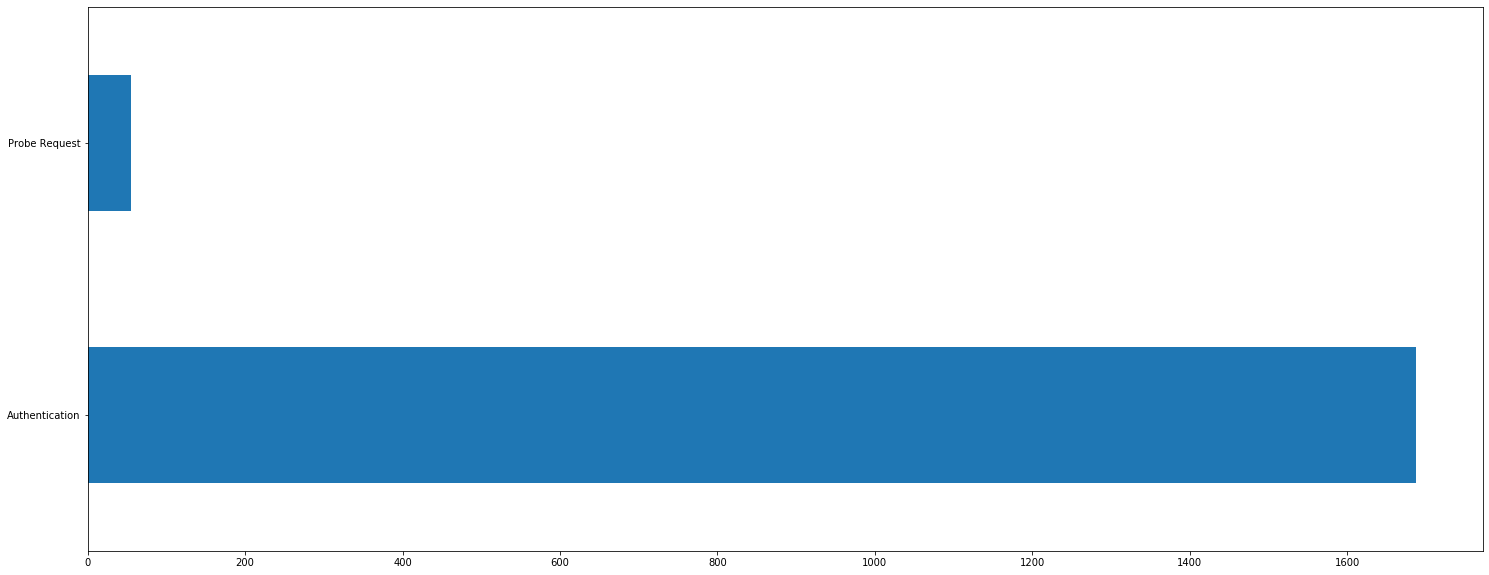

In [40]:
#That might seem important, but as we can see most directed packets are not probe requests
#As we can see, most of these packets were actually Authentication.
wd['Type/Subtype'].value_counts().plot('barh')

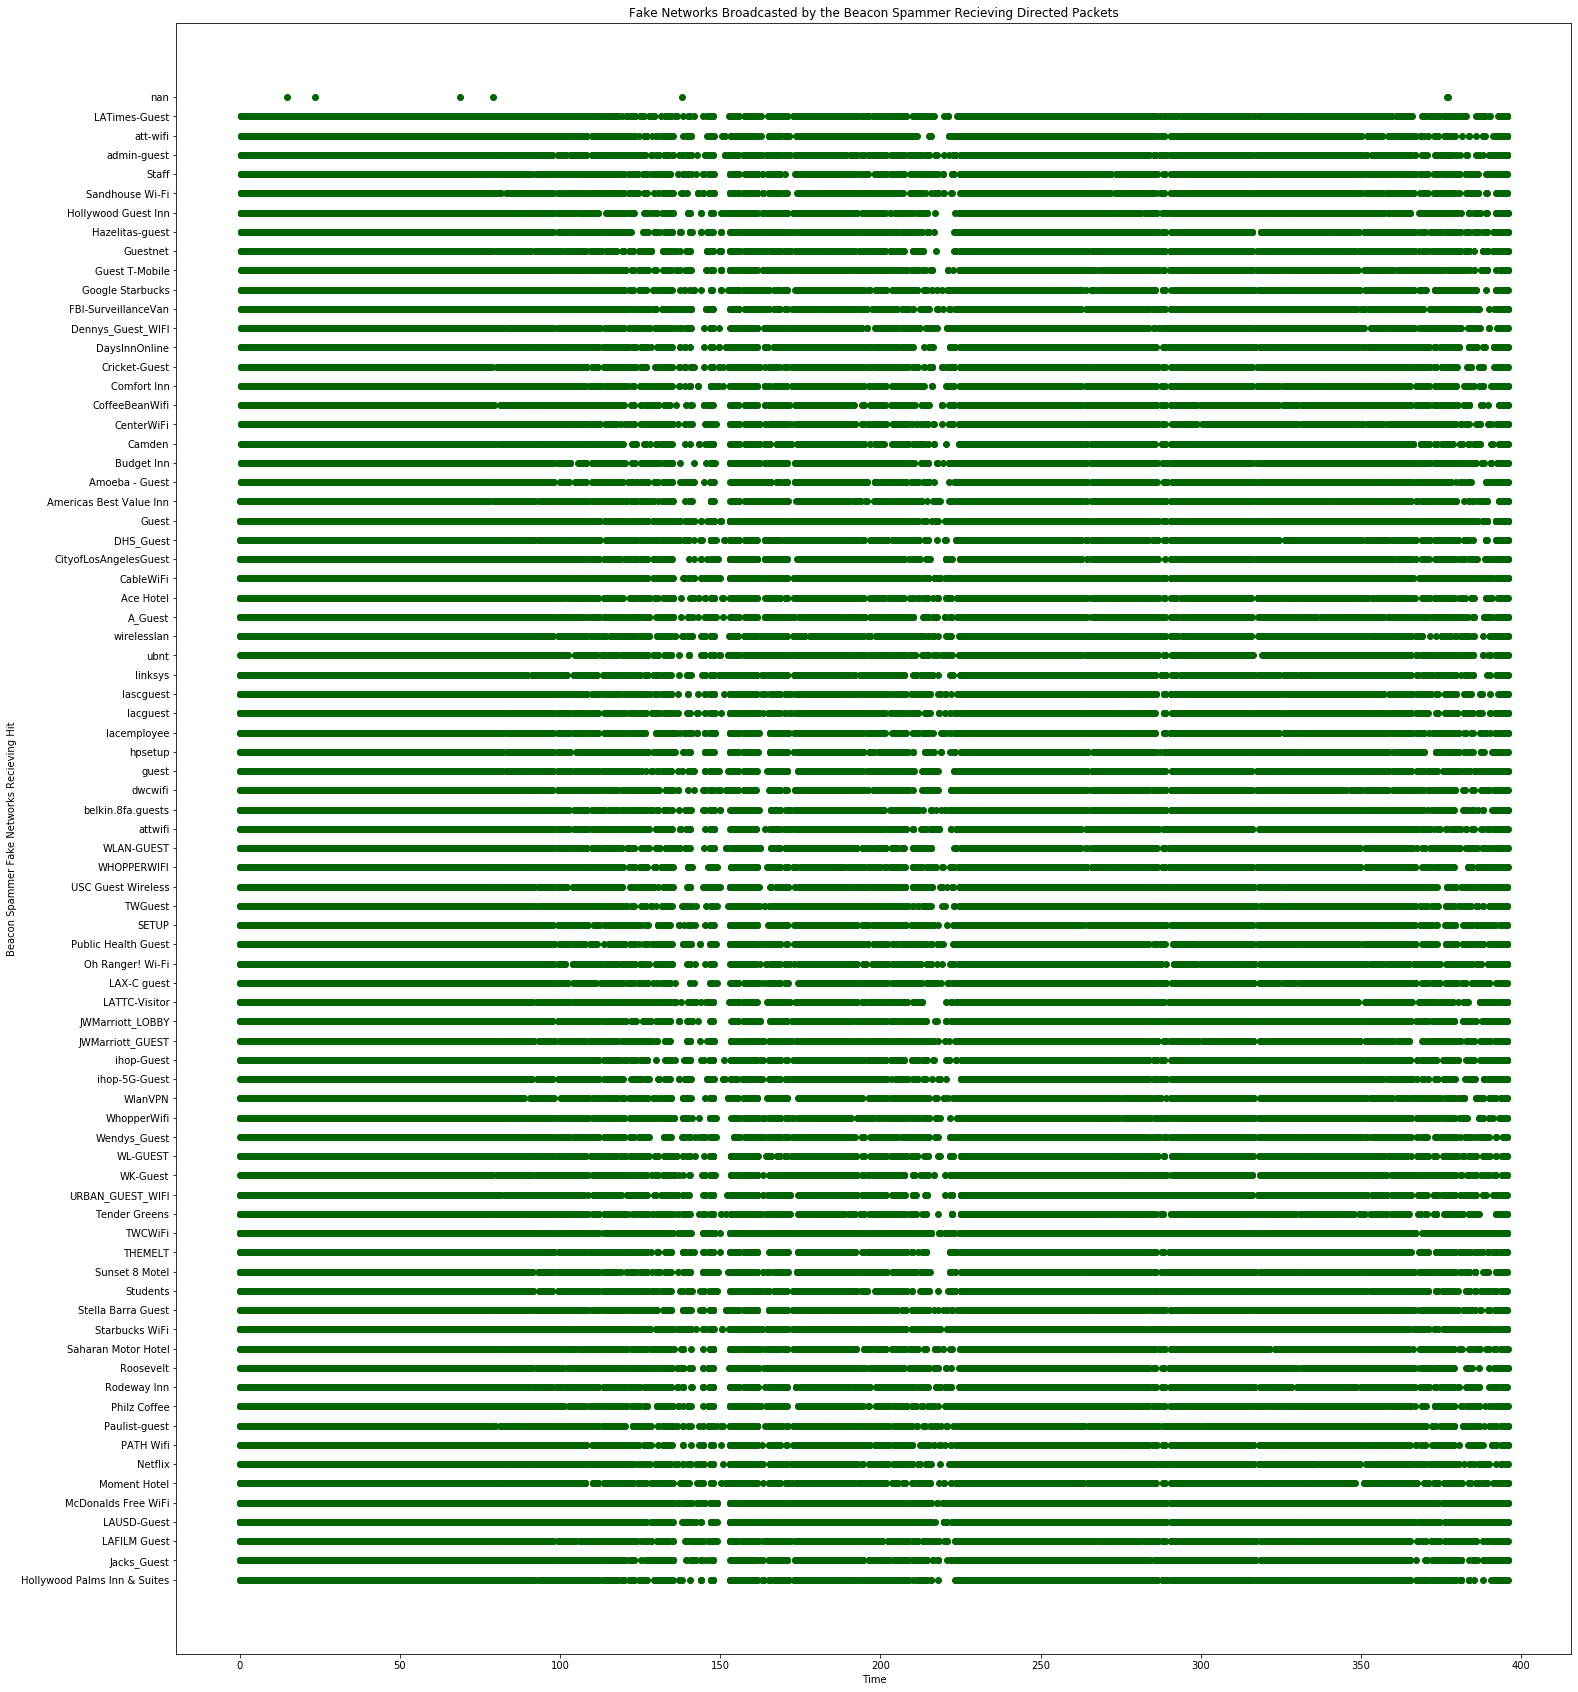

In [109]:
#To label our data, we bring in the beacon frames from our fake networks so we can match them
import numpy as np

bd = pd.read_csv('/Users/skickar/Desktop/UnionBroadcastbeacons.csv', delimiter = ',', encoding='latin-1', header=0) 

cleanedListSSID = [x for x in bd['SSID'] if x != 'nan']
cleanedListTime = [x for x in bd['Time'] if x != 'nan']
cleanedListSource = [x for x in bd['Source'] if x != 'nan']
plt.rcParams["figure.figsize"] = (25,30)
plt.plot(cleanedListTime, cleanedListSSID, 'o', color='DarkGreen')
plt.title('Fake Networks Broadcasted by the Beacon Spammer Recieving Directed Packets')
plt.xlabel('Time')
plt.ylabel('Beacon Spammer Fake Networks Recieving Hit')
plt.show()




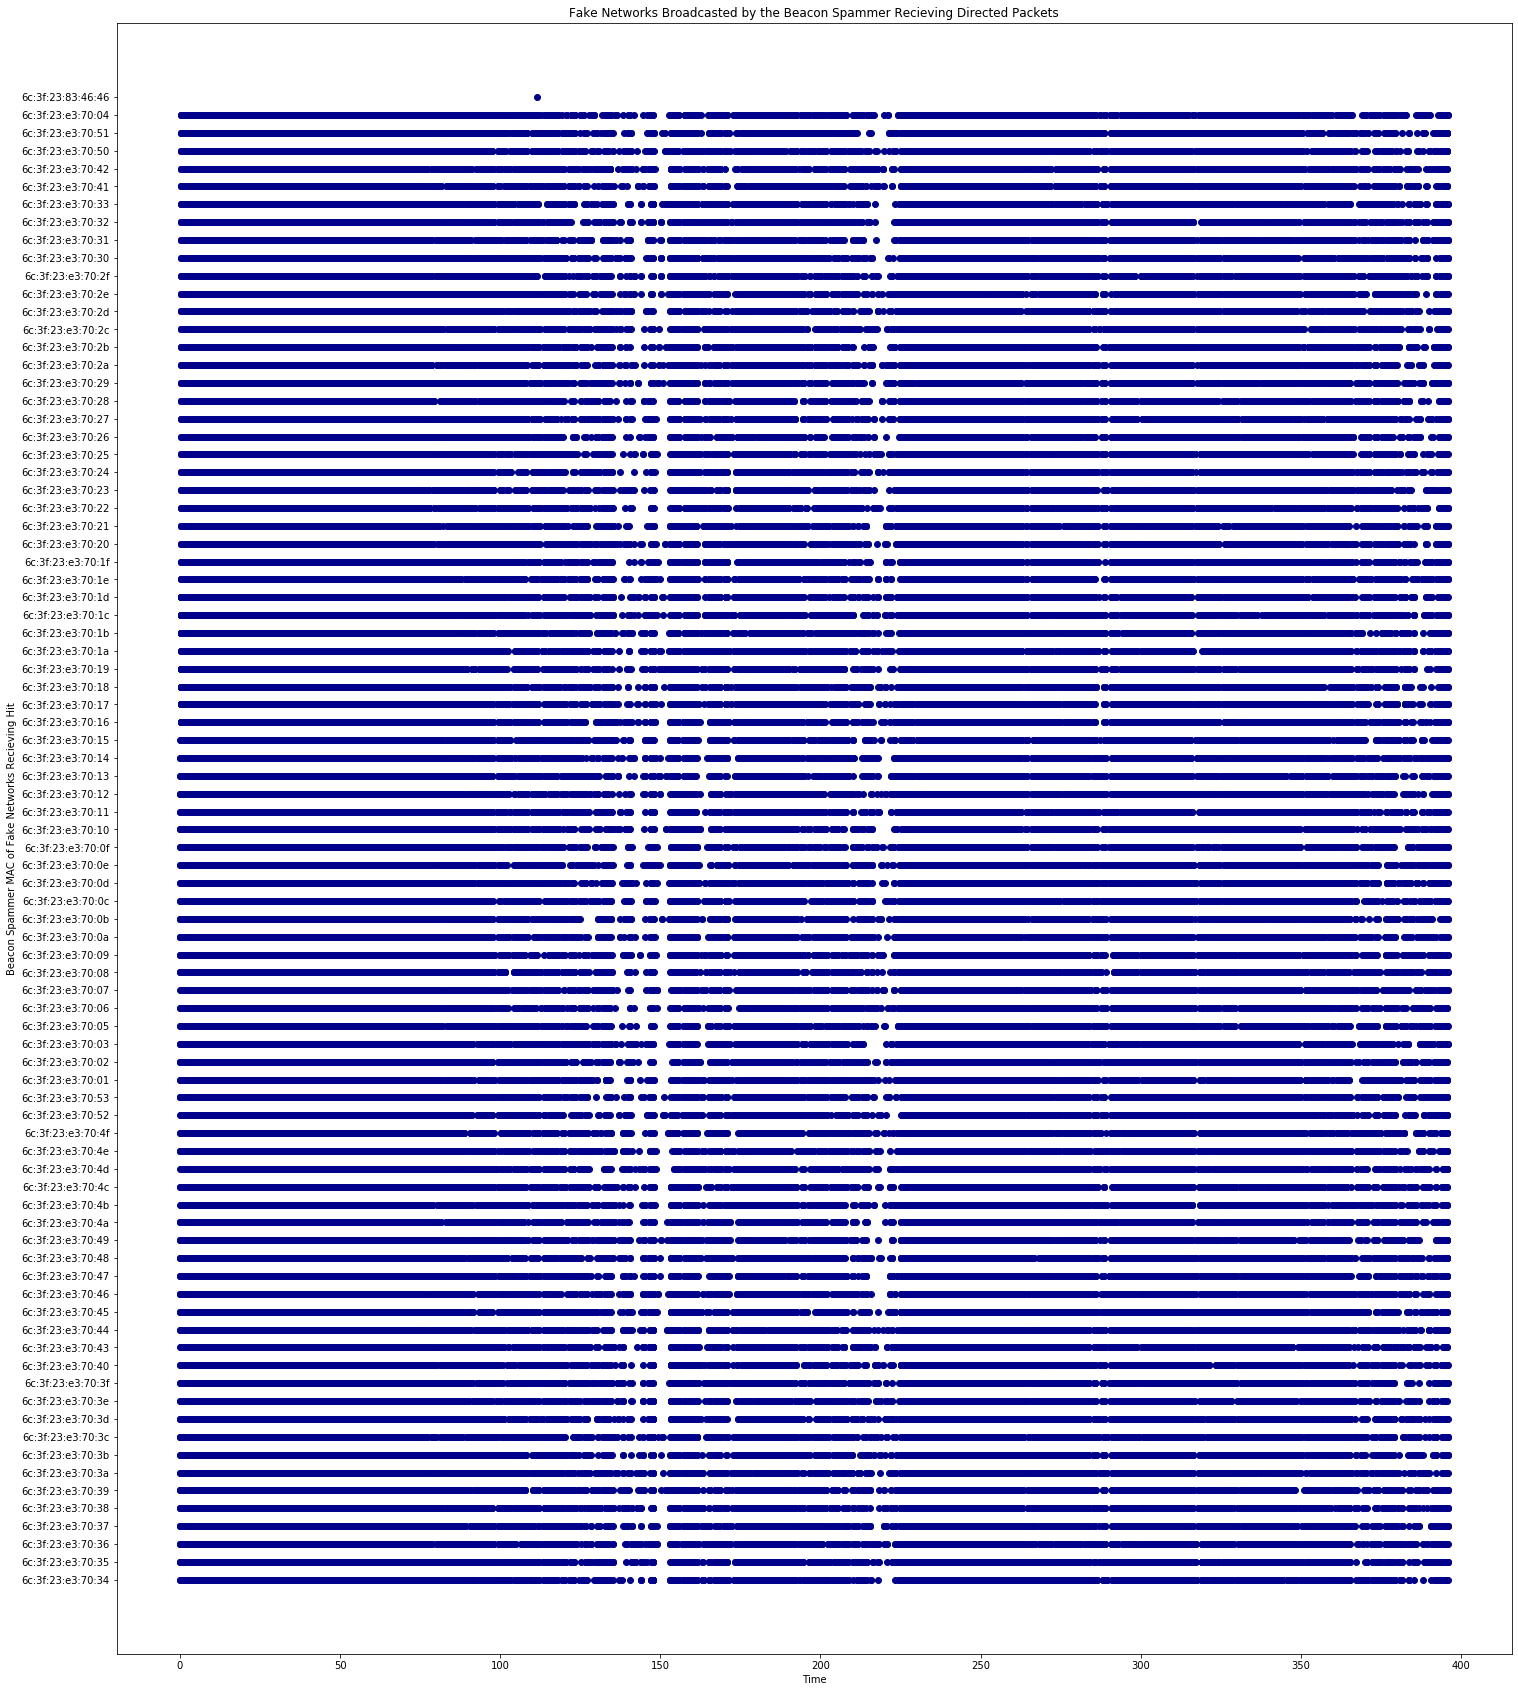

In [81]:
plt.plot(bd['Time'], bd['Transmitter address'], 'o', color='DarkBlue')
plt.title('Fake Networks Broadcasted by the Beacon Spammer Recieving Directed Packets')
plt.xlabel('Time')
plt.ylabel('Beacon Spammer MAC of Fake Networks Recieving Hit')
plt.show()

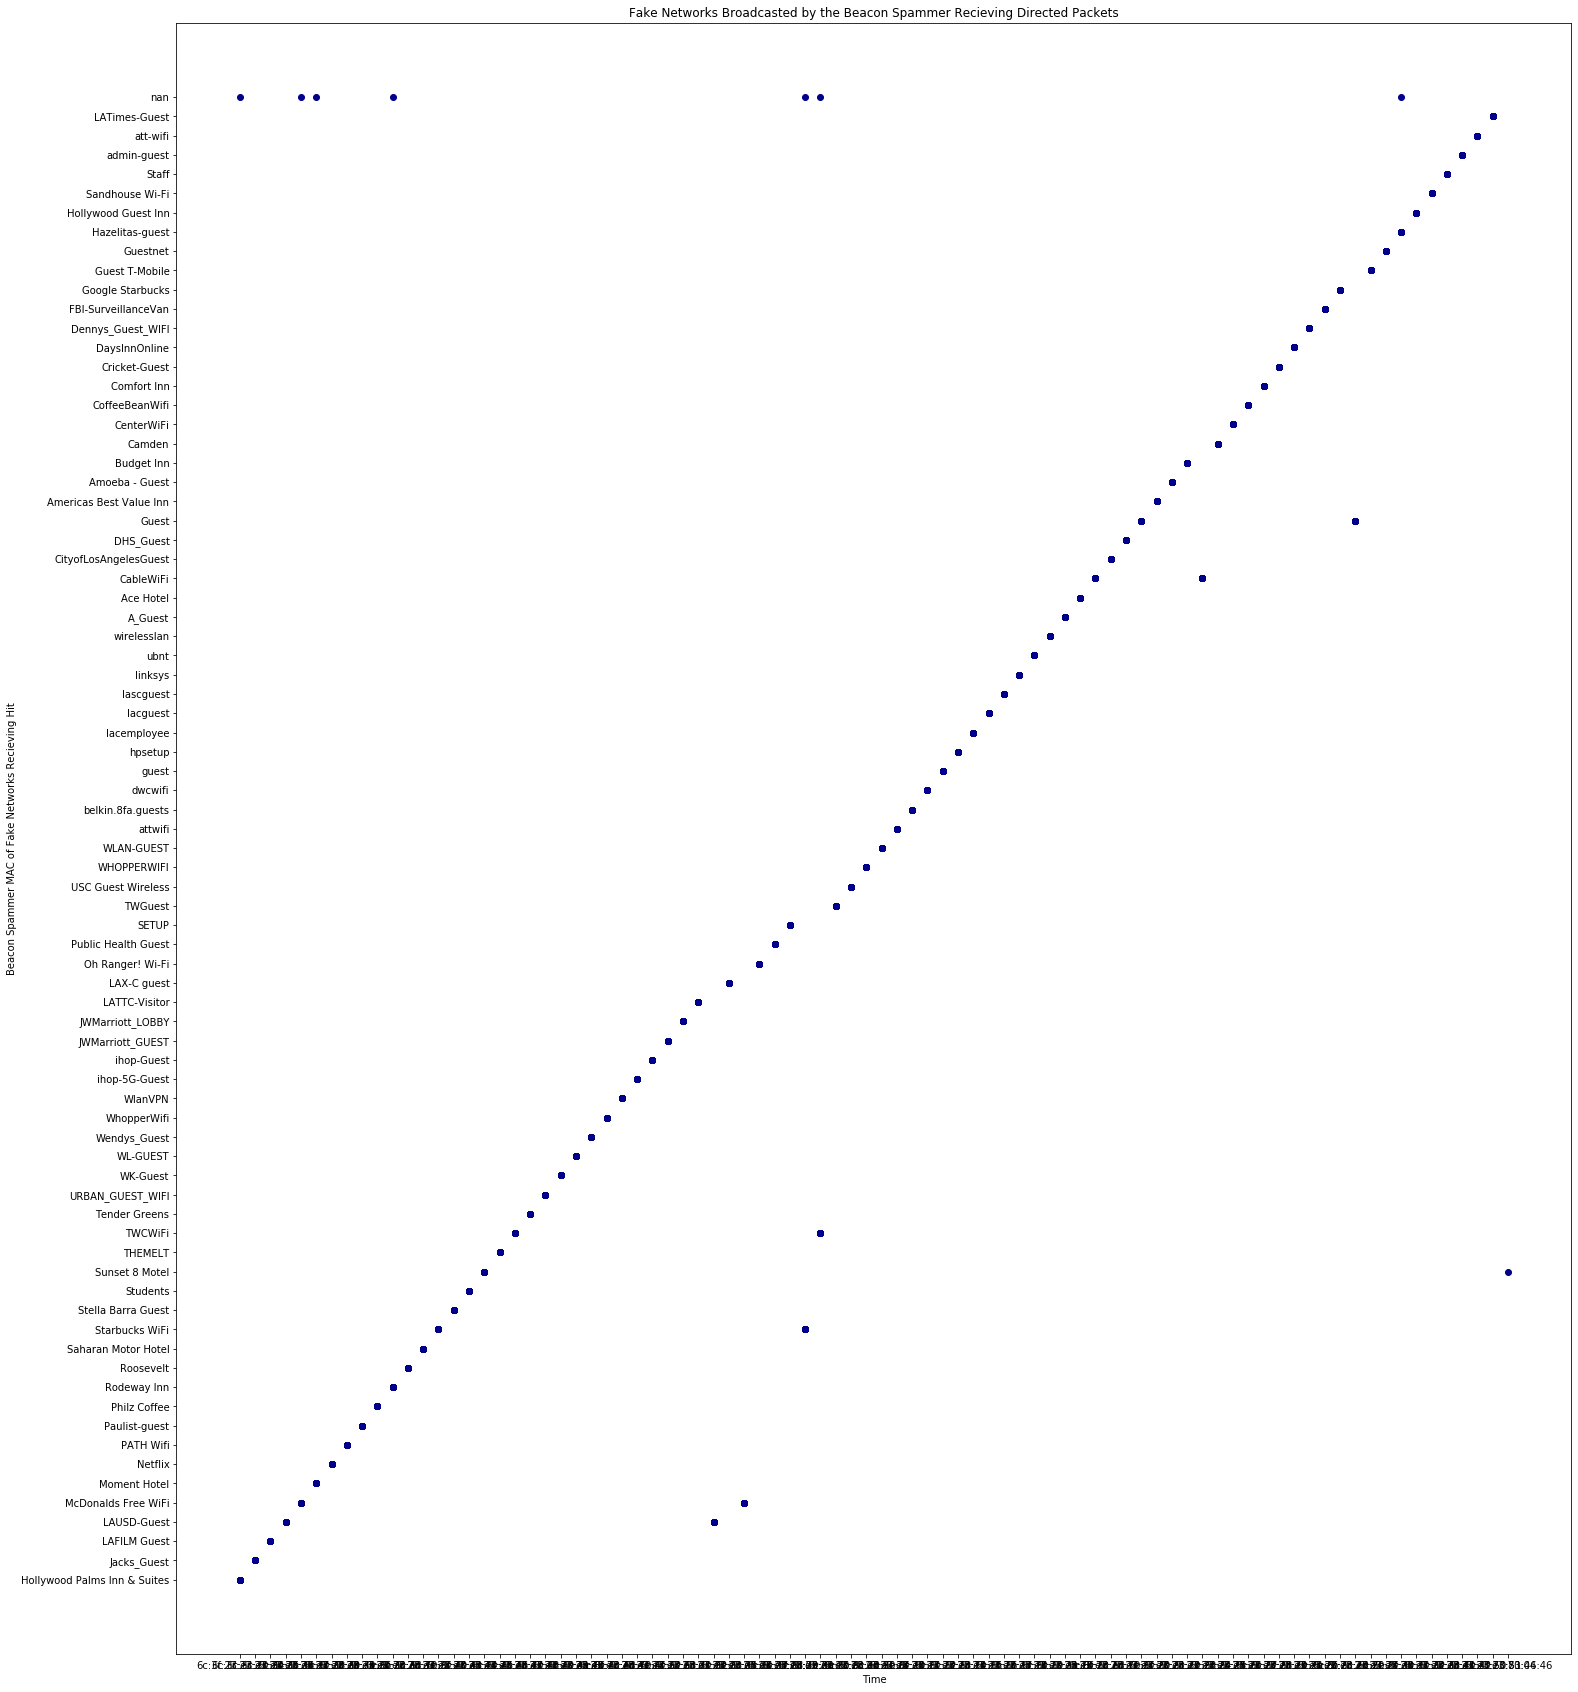

Number of BSSID's 189121
Number of SSID's 189121
Number of Timestamps 189121


In [112]:
plt.plot(cleanedListSource, cleanedListSSID, 'o', color='DarkBlue')
plt.title('Fake Networks Broadcasted by the Beacon Spammer Recieving Directed Packets')
plt.xlabel('Time')
plt.ylabel('Beacon Spammer MAC of Fake Networks Recieving Hit')
plt.show()
# Verify count in dataset is the same after removing the NAN's
print("Number of BSSID's", len(cleanedListSource))
print("Number of SSID's",len(cleanedListSSID))
print("Number of Timestamps",len(cleanedListTime))
